### Student Information

Name: 黃有璿

Student ID: 109062505

GitHub ID: anitahuang121

Kaggle name: Anita210503

Kaggle private scoreboard snapshot: 

Snapshot



In [2]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(train_df.text)

# We can check the shape of this matrix by:
train_df_counts.shape[1]


10115

In [4]:
Term_frequencies = []
for j in range(0,train_df_counts.shape[1]):
    Term_frequencies.append(sum(train_df_counts[:,j].toarray()))

Term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]

In [5]:
zip_iterator = zip(count_vect.get_feature_names(), Term_frequencies)
freq_dict = dict(zip_iterator)

Sorted_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))


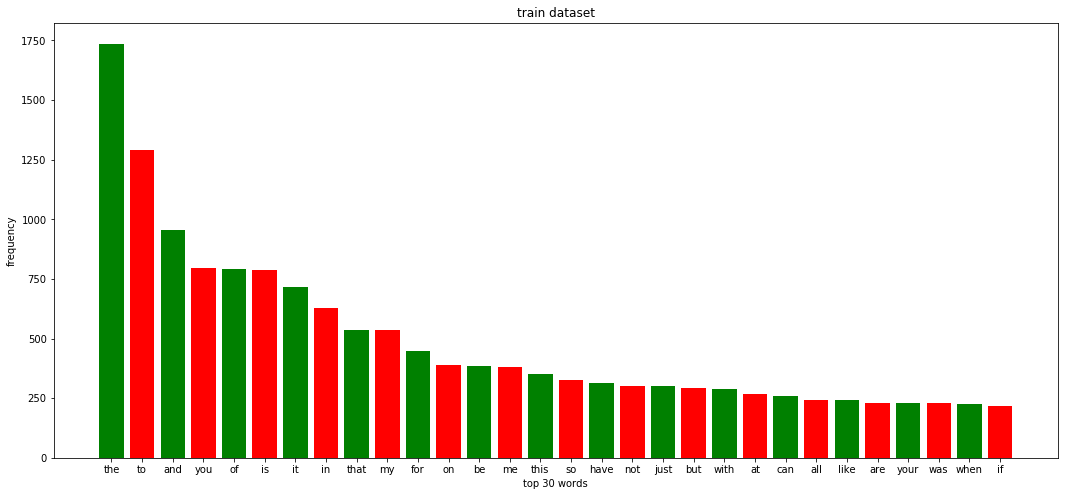

In [6]:
plt.figure(figsize = (18, 8), facecolor = None)
plt.bar(range(30), list(Sorted_dict.values())[0:30], align='center',color = ['g','r'])
plt.xticks(range(30), list(Sorted_dict.keys())[0:30])
plt.title('train dataset')
plt.xlabel('top 30 words')
plt.ylabel('frequency')

plt.show()

<img src="pics/EXERCISE1-1.png">

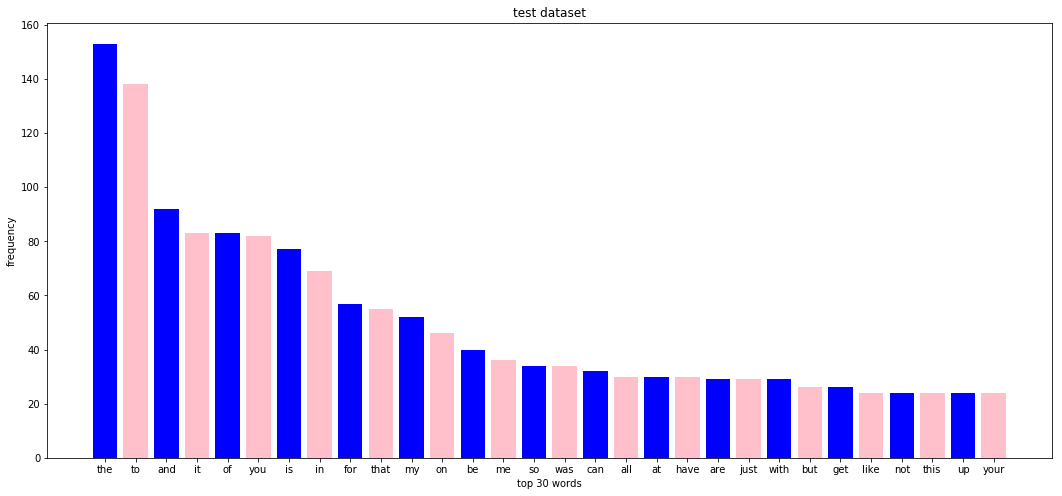

In [7]:
count_vect_test = CountVectorizer()
test_df_counts = count_vect_test.fit_transform(test_df.text)

Term_frequencies_test = []
for j in range(0,test_df_counts.shape[1]):
    Term_frequencies_test.append(sum(test_df_counts[:,j].toarray()))

Term_frequencies_test = np.asarray(test_df_counts.sum(axis=0))[0]
zip_iterator_test = zip(count_vect_test.get_feature_names(), Term_frequencies_test)
freq_dict_test = dict(zip_iterator_test)

Sorted_dict_test = dict(sorted(freq_dict_test.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize = (18, 8), facecolor = None)
plt.bar(range(30), list(Sorted_dict_test.values())[0:30], align='center',color = ['b','pink'])
plt.xticks(range(30), list(Sorted_dict_test.keys())[0:30])
plt.title('test dataset')
plt.xlabel('top 30 words')
plt.ylabel('frequency')

plt.show()

<img src="pics/EXERCISE1-2.png">

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_1000 = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True,
                                   norm='l2',max_features=1000)
tfidf_1000.fit_transform(train_df.text)

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])
train_data_tfidf_features_1000.shape
train_data_tfidf_features_1000.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# observe some feature names
feature_names_1000 = tfidf_1000.get_feature_names()
feature_names_1000[100:110]

['better',
 'between',
 'beyond',
 'big',
 'biggest',
 'bill',
 'birthday',
 'bit',
 'bitch',
 'bitter']

---
### ** >>> Exercise 3 (Take home): **  
<img src="pics/EXERCISE3.png">
Can you interpret the results above? What do they mean?

# Answer here
x軸代表真實的tag('anger', 'fear', 'joy', 'sadness'), y軸代表這個model預測的tag

也就是說同一直行的加總代表實際該種類的數量，同一橫排的總和代表該種類預測的總數

每個方格也代表預測某類與實際某類的數量對照，

以左上的方格舉例，代表實際是anger之中，有55個預測正確(anger)，它右邊那格代表預測是anger，但實際是fear的有13個


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [27]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [28]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

#training!
NB_model = mnb.fit(X_train, y_train)

## predict!
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

## so we get the pred result
y_test_pred_nb[:10]

array(['fear', 'fear', 'fear', 'sadness', 'fear', 'anger', 'anger',
       'anger', 'fear', 'anger'], dtype='<U7')

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

print('nb training accuracy: {}'.format(round(acc_train_nb, 2)))
print('nb testing accuracy: {}'.format(round(acc_test_nb, 2)))


nb training accuracy: 0.79
nb testing accuracy: 0.71


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))

              precision    recall  f1-score   support

       anger       0.68      0.64      0.66        84
        fear       0.73      0.82      0.77       110
         joy       0.75      0.68      0.72        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.71       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.71      0.70       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb) 
print(cm_nb)

[[54 15  5 10]
 [ 7 90  5  8]
 [10  8 54  7]
 [ 8 11  8 47]]


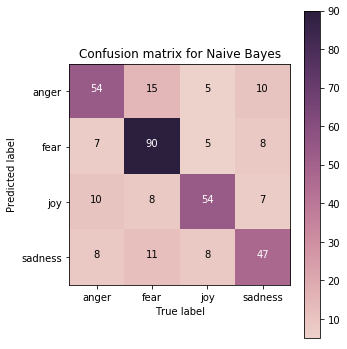

In [32]:
from sklearn.metrics import plot_confusion_matrix
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
    
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']

plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion matrix for Naive Bayes')

<img src="pics/EXERCISE4.png">

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here

decision tree:

    training accuracy: 0.99

    testing accuracy: 0.66

naive bayes:

    training accuracy: 0.79
    
    testing accuracy: 0.71

we can see that the training accuracy for decision tree is higher than naive bayes，

but the testing accuracy for decision tree is lower than naive bayes

this may be a overfitting because its high training accuracy and low testing accuracy.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [34]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [35]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2281      joy
508     anger
244     anger
1115     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [36]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

In [38]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 98/113 [=========================>....] - ETA: 0s - loss: 1.3338 - accuracy: 0.3543WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff8d021ff28> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

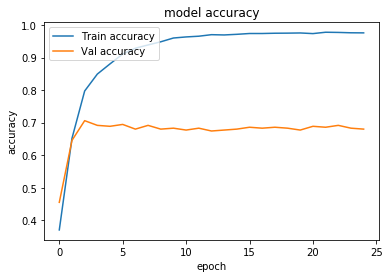

In [42]:
# Answer here
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper left')
plt.show()


<img src="pics/EXERCISE6-1.png">

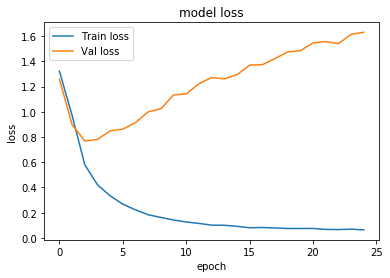

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper left')
plt.show()

<img src="pics/EXERCISE6-2.png">

We can see that the accuracy is high for training data but low in validation data, 

and validation loss is more higher than train loss.

It is obvious be an overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


1. Remove all stop words

2. decompose each word to a vector which is a list of value

3. accumulate all the vectors of words in each sentence to be the final predict vector.



---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [1]:
# Answer here
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')



load ok


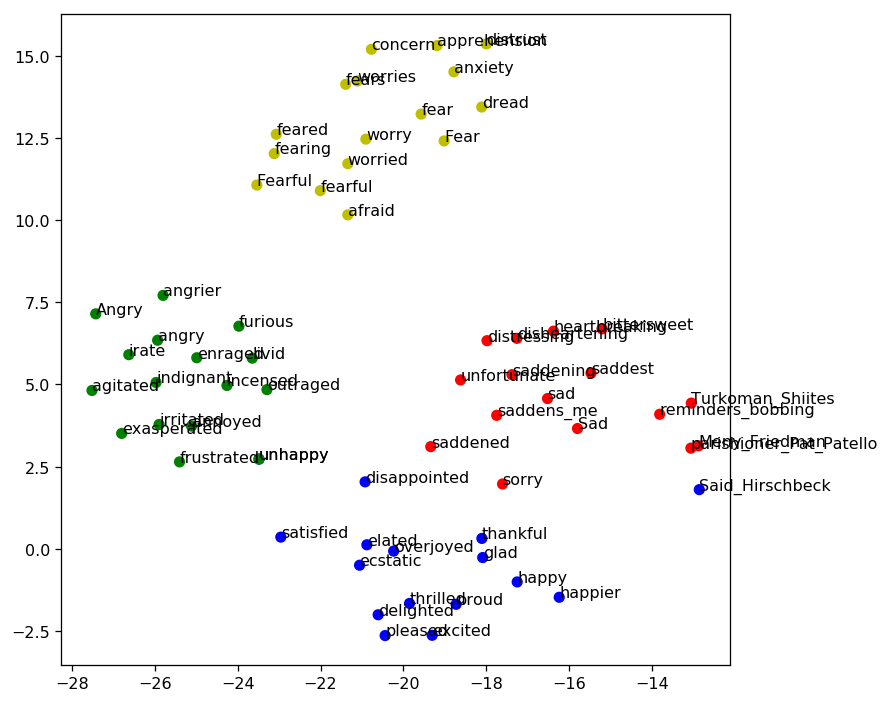

In [2]:
word_list_exercise = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]  

target_words = happy_words + angry_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()